<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [38]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

In [39]:
%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [18]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



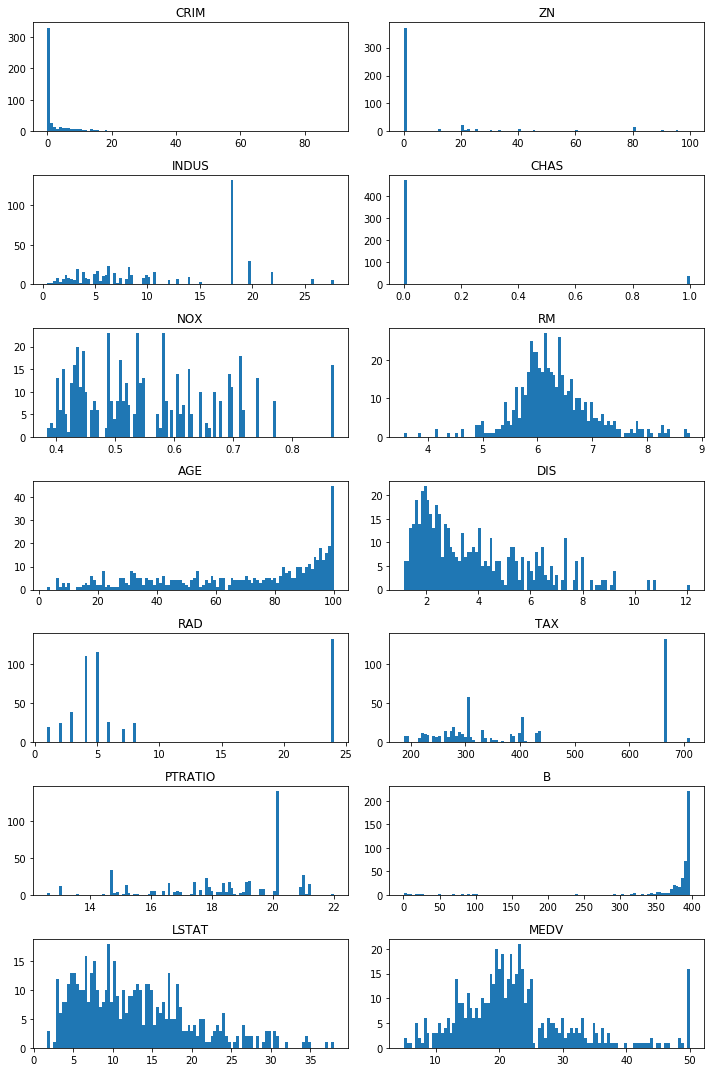

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 15))
ax = axes.flatten()
for n, axis in enumerate(ax):
    ax[n].hist(data.iloc[:,n], bins=100)
    ax[n].set_title(data.iloc[:,n].name)
plt.tight_layout()

Нормальное - RM; MEDV;
Равномерное - нет;
Биноминальное - RAD;
Бернулли - CHAS;
Геометрическое - CRIM;
Логнормальное - DIS; LSTAT

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

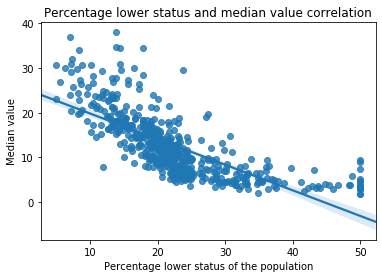

In [21]:
medv = data["MEDV"]
lstat = data["LSTAT"]
sns.regplot(x=medv, y=lstat, data=data, fit_reg=True)
plt.xlabel("Percentage lower status of the population")
plt.ylabel("Median value")
plt.title("Percentage lower status and median value correlation")
plt.show()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [22]:
medv.fillna(0, inplace = True)
lstat.fillna(0, inplace = True)
medv_n = np.array(medv).reshape(-1,1)
lstat_n = np.array(lstat).reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(medv_n, lstat_n, test_size = 0.2, random_state = 3)

In [13]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.5663680841829948

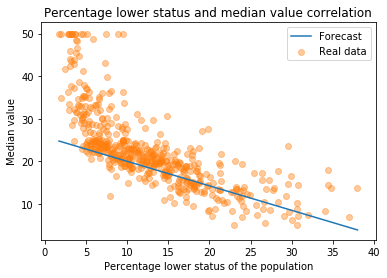

In [15]:
lstat_min = min(lstat)
lstat_max = max(lstat)

x = np.linspace(lstat_min, lstat_max, 100)
y = model.coef_ * x + model.intercept_
plt.plot(x,y.T, label="Forecast")
plt.scatter(lstat, medv, c='#ff7f0e', alpha=0.4, label="Real data")

plt.xlabel("Percentage lower status of the population")
plt.ylabel("Median value")
plt.title("Percentage lower status and median value correlation")
plt.legend()